# Marketing Campaign Effectiveness Analysis

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Customer Demographic Data
cust_demo_data = pd.read_csv("/Users/anjalipriya/Downloads/Datasets/customer_demographic_data.csv")
cust_demo_data.head()

,Customer ID,Age,Gender,Location,Income Level
0,1,65,Male,Martinezmouth,61083
1,2,43,Non-binary,South Anne,90419
2,3,58,Non-binary,West Darrellport,38260
3,4,53,Non-binary,Stevenshire,34649
4,5,69,Female,South Kellychester,70420


In [10]:
# Customer Interactive Data
cust_inter_data =  pd.read_csv("/Users/anjalipriya/Downloads/Datasets/customer_interactions.csv")
cust_inter_data.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel
0,1,2/28/2024,share,website
1,2,4/27/2024,view,social media
2,3,2/26/2024,share,email
3,4,2/13/2024,click,email
4,5,4/1/2024,share,social media


In [14]:
# Sales Data
sales_data = pd.read_csv("/Users/anjalipriya/Downloads/Datasets/sales_data.csv")
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,1/19/2024,213,345,Books,295.15,7
1,2,6/11/2024,59,134,Electronics,457.78,1
2,3,1/10/2024,178,89,Electronics,423.84,2
3,4,5/30/2024,359,423,Home & Kitchen,497.52,1
4,5,3/21/2024,384,139,Clothing,164.21,7


## Data cleaning

### Customer Demographic Data

In [18]:
cust_demo_data.dtypes

Customer ID      int64
Age              int64
Gender          object
Location        object
Income Level     int64
dtype: object

In [26]:
cust_demo_data.isnull().sum()

Customer ID     0
Age             0
Gender          0
Location        0
Income Level    0
dtype: int64

### Customer Interactive Data

In [33]:
cust_inter_data.dtypes

Customer ID             int64
Interaction Date       object
Interaction Type       object
Interaction Channel    object
dtype: object

In [37]:
cust_inter_data["Interaction Date"] = cust_inter_data["Interaction Date"].astype("datetime64[ns]")

In [39]:
cust_inter_data.dtypes

Customer ID                     int64
Interaction Date       datetime64[ns]
Interaction Type               object
Interaction Channel            object
dtype: object

In [41]:
cust_inter_data.isnull().sum()

Customer ID             0
Interaction Date        0
Interaction Type        0
Interaction Channel    11
dtype: int64

In [43]:
cust_inter_data.shape

(1000, 4)

In [45]:
cust_inter_data["Interaction Channel"].value_counts()

Interaction Channel
website         334
email           329
social media    326
Name: count, dtype: int64

In [47]:
# replacing the missing value by more frequent value
cust_inter_data["Interaction Channel"].fillna("website",inplace = True)

In [49]:
cust_inter_data.isnull().sum()

Customer ID            0
Interaction Date       0
Interaction Type       0
Interaction Channel    0
dtype: int64

### Sales Data

In [53]:
sales_data.dtypes

Transaction ID        int64
Transaction Date     object
Customer ID           int64
Product ID            int64
Product Category     object
Sales Amount        float64
Quantity              int64
dtype: object

In [55]:
 sales_data["Transaction Date"] = sales_data["Transaction Date"].astype("datetime64[ns]")

In [57]:
sales_data.dtypes

Transaction ID               int64
Transaction Date    datetime64[ns]
Customer ID                  int64
Product ID                   int64
Product Category            object
Sales Amount               float64
Quantity                     int64
dtype: object

In [59]:
sales_data.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer ID         0
Product ID          0
Product Category    0
Sales Amount        0
Quantity            0
dtype: int64

## Data Analysis

#### How many customers interacted with our campaign materials, and what was the engagement rate?

In [65]:
cust_inter_data.head(2)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel
0,1,2024-02-28,share,website
1,2,2024-04-27,view,social media


In [75]:
#Total customers interacted with our campaign
cust_inter_data["Customer ID"].nunique()

1000

In [79]:
# Total customers interacted with our campaign by Type
total = (cust_inter_data["Interaction Type"].value_counts()/1000)*100
total

Interaction Type
share    35.6
click    32.6
view     31.8
Name: count, dtype: float64

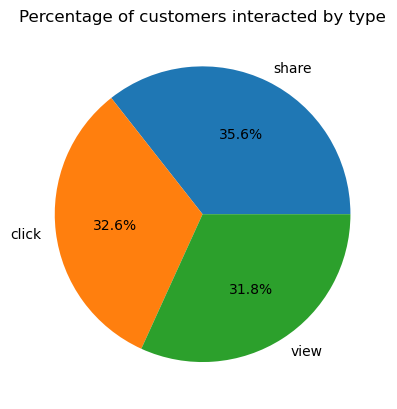

In [85]:
plt.pie(total,labels = total.index,autopct = '%1.1f%%')
plt.title("Percentage of customers interacted by type")
plt.show()

In [91]:
# Total customers interacted with our campaign by channel
total_Channel = cust_inter_data["Interaction Channel"].value_counts()
total_Channel

Interaction Channel
website         345
email           329
social media    326
Name: count, dtype: int64

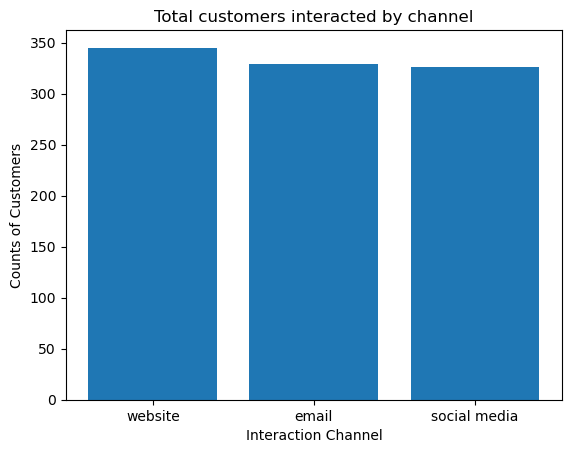

In [93]:
plt.bar(total_Channel.index,total_Channel.values)
plt.title("Total customers interacted by channel")
plt.xlabel("Interaction Channel")
plt.ylabel("Counts of Customers")
plt.show()

### Engagement Rate for the Campaign

In [99]:
engagement_rate = (1000/1500)*100
print("Engagement rate :",round(engagement_rate,2),"%")

Engagement rate : 66.67 %


#### What percentage of engaged customers made a purchase, and how does this compare to our targets?

In [103]:
cust_intr_purch = cust_inter_data.merge(sales_data, on = "Customer ID", how = "inner")
cust_intr_purch.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


In [105]:
total_cust_intr_purch = cust_intr_purch["Customer ID"].nunique()
total_cust_intr_purch

656

In [107]:
purch_rate_targeted = (total_cust_intr_purch/1500)*100
purch_rate_engaged = (total_cust_intr_purch/1000)*100

print("Purchase rate by targeted customers :", round(purch_rate_targeted,2),"%")
print("Purchase rate by engaged customers :", round(purch_rate_engaged,2),"%")


Purchase rate by targeted customers : 43.73 %
Purchase rate by engaged customers : 65.6 %


#### What was the overall impact on sales? Did we see a significant increase in sales during and after the campaign period?

In [112]:
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-01-19,213,345,Books,295.15,7
1,2,2024-06-11,59,134,Electronics,457.78,1
2,3,2024-01-10,178,89,Electronics,423.84,2
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1
4,5,2024-03-21,384,139,Clothing,164.21,7


In [114]:
sales_data["Transaction Date"].min()

Timestamp('2024-01-01 00:00:00')

In [116]:
sales_data["Transaction Date"].max()

Timestamp('2024-07-06 00:00:00')

In [118]:
sales_data["Total Sales"] = sales_data["Sales Amount"]*sales_data["Quantity"]
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Total Sales
0,1,2024-01-19,213,345,Books,295.15,7,2066.05
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47


In [122]:
sales_data["Month"] = sales_data["Transaction Date"].dt.month
sales_data["Day"] = sales_data["Transaction Date"].dt.day
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Total Sales,Month,Day
0,1,2024-01-19,213,345,Books,295.15,7,2066.05,1,19
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78,6,11
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68,1,10
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52,5,30
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47,3,21


In [132]:
sales_campaign = sales_data[sales_data["Month"]<5]["Total Sales"]
sales_campaign

0       2066.05
2        847.68
4       1149.47
5       2875.20
6        977.55
         ...   
1362     378.48
1364     440.93
1365    2882.76
1366     286.68
1369    1762.14
Name: Total Sales, Length: 918, dtype: float64

In [134]:
sales_after_camp = sales_data[sales_data["Month"]>4]["Total Sales"]
sales_after_camp

1        457.78
3        497.52
9       1014.58
10       659.16
15      4341.80
         ...   
1360    1022.36
1361    3395.34
1363    2393.30
1367     481.28
1368    1094.80
Name: Total Sales, Length: 452, dtype: float64

In [142]:
total_Sales_campaign = sum(sales_campaign)
print("Total sales during campaign:", total_Sales_campaign)

Total sales during campaign: 1308551.4799999981


In [144]:
total_sales_after_camp = sum(sales_after_camp)
print("Total sales during campaign:", total_sales_after_camp)

Total sales during campaign: 637323.8199999998


### Increase/decrease rate of sales

In [147]:
sales_incr_rate = ((total_Sales_campaign - total_sales_after_camp) / total_sales_after_camp)*100
print("Sales increase rate :", round(sales_incr_rate,2),"%")

Sales increase rate : 105.32 %


#### How does the ROI of this campaign compare to previous ones? Was our spending justified by the results?

In [150]:
# ROI of recent campaign
roi_recent = ((total_Sales_campaign - 50000)/50000)*100
print("ROI of recent campaign :", round(roi_recent,2))

ROI of recent campaign : 2517.1


In [152]:
# ROI of previous campaign
roi_previous = ((268009 - 57000)/57000)*100
print("ROI of previous campaign :", round(roi_previous,2))

ROI of previous campaign : 370.19


In [158]:
roi_growth = ((roi_recent - roi_previous) / roi_previous)*100
print("ROI growth rate :", round(roi_growth,2), "%")

ROI growth rate : 579.95 %


#### Which customer demographics responded most positively or negatively to the campaign? Are there specific segments we should focus on or avoid in the future?

In [186]:
# customer engagement rates by segments
interacted_cust = cust_demo_data.merge(cust_inter_data,on = "Customer ID",how = "inner")
interacted_cust.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
0,1,65,Male,Martinezmouth,61083,2024-02-28,share,website
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media
2,3,58,Non-binary,West Darrellport,38260,2024-02-26,share,email
3,4,53,Non-binary,Stevenshire,34649,2024-02-13,click,email
4,5,69,Female,South Kellychester,70420,2024-04-01,share,social media


In [205]:
young_low_income_intr = interacted_cust[(interacted_cust["Age"] > 17) & (interacted_cust["Age"] < 25) &  (interacted_cust["Income Level"] < 30000)]                    
young_low_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
51,52,20,Other,Dianaton,19176,2024-05-04,view,social media
64,65,21,Male,Lukemouth,26780,2024-01-18,click,social media
92,93,20,Other,Port Marvin,23532,2024-03-11,view,social media
114,115,20,Female,Lake Robertfurt,14709,2024-02-06,share,website
138,139,23,Non-binary,Cherylburgh,19490,2024-04-05,view,email


In [207]:
young_medium_income_intr = interacted_cust[(interacted_cust["Age"] > 17) & (interacted_cust["Age"] < 25) & (interacted_cust["Income Level"] > 30000) & (interacted_cust["Income Level"] < 75000)]
young_medium_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
8,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email
12,13,23,Non-binary,Port Vincent,46646,2024-02-01,share,social media
20,21,19,Non-binary,Paceview,53522,2024-04-27,share,website
72,73,22,Non-binary,Sherriton,55401,2024-02-05,click,social media
82,83,19,Female,Gibbsstad,44655,2024-03-02,click,email


In [209]:
middle_high_income_intr = interacted_cust[(interacted_cust["Age"] > 24) & (interacted_cust["Income Level"] > 75000)]
middle_high_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media
6,7,43,Male,Lake Joseph,89845,2024-03-03,click,website
9,10,37,Non-binary,Port Andrew,81745,2024-05-01,share,email
16,17,66,Other,East Jessica,95692,2024-04-16,click,email
19,20,41,Male,North David,77251,2024-03-11,click,website


In [211]:
young_low_income_intr_cust = young_low_income_intr["Customer ID"].nunique()
egr_low_income_intr_cust = (young_low_income_intr_cust / 1000)*100
round(egr_low_income_intr_cust,2)

2.9

In [213]:
young_medium_income_intr = young_medium_income_intr["Customer ID"].nunique()
egr_medium_income_intr = (young_medium_income_intr / 1000)*100
round(egr_medium_income_intr,2)

7.7

In [215]:
middle_high_income_intr = middle_high_income_intr["Customer ID"].nunique()
egr_middle_high_income_intr = (middle_high_income_intr / 1000)*100
round(egr_middle_high_income_intr,2)

22.8

#### Customer coversion rates by segments

In [217]:
converted_cust_data = cust_demo_data.merge(cust_intr_purch, on = "Customer ID" , how = "inner")
converted_cust_data.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,65,Male,Martinezmouth,61083,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


In [221]:
young_low_income_cnvr = converted_cust_data[(converted_cust_data["Age"] > 17) & (converted_cust_data["Age"] < 25) & (converted_cust_data["Income Level"] < 30000)]
young_low_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
85,52,20,Other,Dianaton,19176,2024-05-04,view,social media,849,2024-05-19,88,Books,488.03,4
86,52,20,Other,Dianaton,19176,2024-05-04,view,social media,1105,2024-04-27,195,Home & Kitchen,264.88,3
101,65,21,Male,Lukemouth,26780,2024-01-18,click,social media,584,2024-02-25,31,Clothing,313.44,6
168,115,20,Female,Lake Robertfurt,14709,2024-02-06,share,website,1356,2024-02-27,128,Toys,43.71,6
209,139,23,Non-binary,Cherylburgh,19490,2024-04-05,view,email,616,2024-02-23,177,Toys,284.77,10


In [223]:
young_medium_income_cnvr = converted_cust_data[(converted_cust_data["Age"] > 17) & (converted_cust_data["Age"] < 25) & (converted_cust_data["Income Level"] > 30000) & (converted_cust_data["Income Level"] < 75000)]
young_medium_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
11,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,64,2024-02-02,372,Books,492.84,5
12,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,119,2024-02-26,162,Home & Kitchen,425.09,3
13,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,1205,2024-03-14,232,Toys,188.41,3
30,21,19,Non-binary,Paceview,53522,2024-04-27,share,website,491,2024-03-25,207,Electronics,489.17,2
31,21,19,Non-binary,Paceview,53522,2024-04-27,share,website,581,2024-06-25,231,Home & Kitchen,110.57,7


In [225]:
middle_high_income_cnvr = converted_cust_data[(converted_cust_data["Age"] > 24) & (converted_cust_data["Income Level"] > 75000)]
middle_high_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7
14,10,37,Non-binary,Port Andrew,81745,2024-05-01,share,email,342,2024-01-06,116,Books,11.30,1


In [233]:
young_low_income_cnvr_cust = young_low_income_cnvr["Customer ID"].nunique()
cnvr_young_low_income_cust = (young_low_income_cnvr_cust / total_cust_intr_purch)*100
round(cnvr_young_low_income_cust,2)

2.74

In [235]:
young_medium_income_cnvr_cust = young_medium_income_cnvr["Customer ID"].nunique()
cnvr_young_medium_income_cust = (young_medium_income_cnvr_cust / total_cust_intr_purch)*100
round(cnvr_young_medium_income_cust,2)

8.38

In [237]:
middle_high_income_cnvr_cust = middle_high_income_cnvr["Customer ID"].nunique()
cnvr_middle_high_income_cust = (middle_high_income_cnvr_cust / total_cust_intr_purch)*100
round(cnvr_middle_high_income_cust,2)

22.87